In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Load the dataset
data = pd.read_parquet("sample_data/train.parquet")

In [13]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [14]:
# Assuming the ideal treatment duration is 1 year
ideal_duration = pd.DateOffset(years=1)

In [15]:
# Calculate drop-off rate by counting the number of patients who stopped each month
data['Month'] = data['Date'].dt.to_period('M')
dropoff_rate = data.groupby('Month')['Patient-Uid'].nunique()

In [16]:
# Convert the 'Month' period to a string for plotting
dropoff_rate.index = dropoff_rate.index.strftime('%Y-%m')

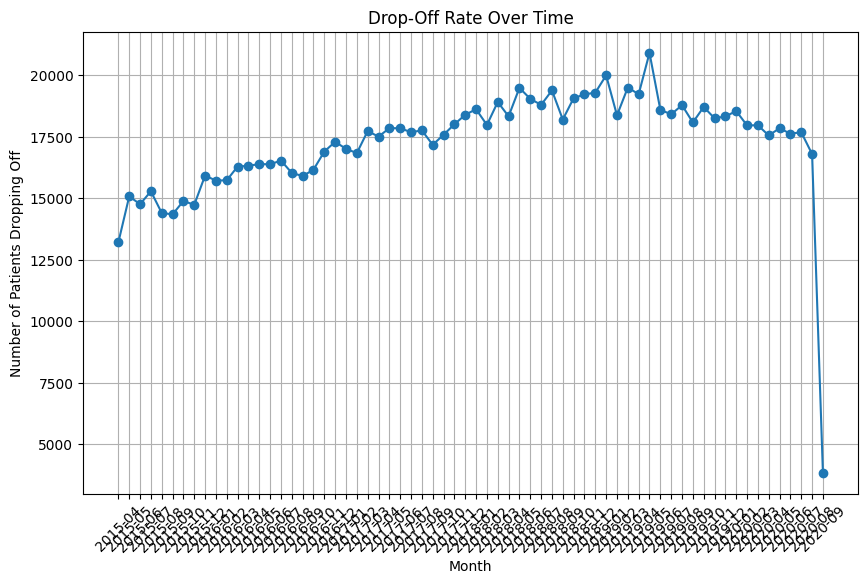

In [17]:
# Plot the drop-off rate over time
plt.figure(figsize=(10, 6))
plt.plot(dropoff_rate.index, dropoff_rate.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Patients Dropping Off')
plt.title('Drop-Off Rate Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [19]:
# To analyze what events are driving drop-off, examine the 'Incident' column and identify common incidents associated with patients stopping treatment.
common_incidents = data['Incident'].value_counts()

# Print the most common incidents
print("Common Incidents Leading to Drop-Off:")
print(common_incidents.head(10))


Common Incidents Leading to Drop-Off:
DRUG_TYPE_6          561934
DRUG_TYPE_1          484666
PRIMARY_DIAGNOSIS    431902
DRUG_TYPE_0          300005
DRUG_TYPE_7          258782
DRUG_TYPE_2          256841
DRUG_TYPE_8          160066
DRUG_TYPE_3          127676
TEST_TYPE_1           96810
TARGET DRUG           67218
Name: Incident, dtype: int64


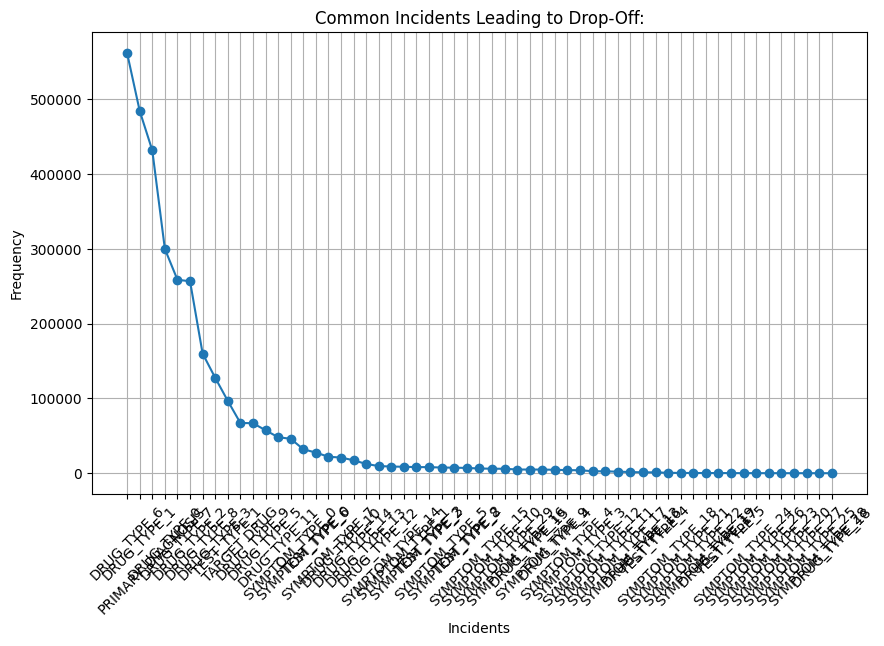

In [21]:
# Plot graph for common incidents leading to drp-off ( Incidents Vs Frequency)
plt.figure(figsize=(10, 6))
plt.plot(common_incidents, marker='o', linestyle='-')
plt.xlabel('Incidents')
plt.ylabel('Frequency')
plt.title('Common Incidents Leading to Drop-Off:')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()